In [1]:
#!pip install pygwalker

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

import nltk
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
os.chdir('D:\\Datasets')

In [3]:
tiktok = pd.read_csv('tiktok_dataset.csv')

In [4]:
#Number of rows and columns in the dataset
tiktok.shape

(19382, 12)

In [5]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
tiktok.describe(include= 'all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [7]:
tiktok

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [8]:
#hecking for missing values
tiktok.isnull().sum() 

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
#Removed all missing values
tiktok.dropna(axis = 0, inplace = True) 

In [10]:
#Verifyig if all null values are removed
tiktok.isnull().sum() 

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [11]:
tiktok.shape

(19084, 12)

In [12]:
tiktok.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

# Data Preprocessing

In [13]:
# LowerCasing
tiktok['video_transcription_text'] = tiktok['video_transcription_text'].str.lower()


In [14]:
tiktok['video_transcription_text'][0]

'someone shared with me that drone deliveries are already happening and will become common by 2025'

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [16]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(x):
    return sia.polarity_scores(x)

In [17]:
tiktok['sentiment_score'] = tiktok['video_transcription_text'].apply(lambda x : get_sentiment(x))

In [18]:
def get_sentiment(x):
    if x.get('compound') > 0:
        return 'positive'
    elif x.get('compound') < 0:
        return 'negative'
    else:
        return 'neutral'

In [19]:
tiktok['video_text_sentiment'] = tiktok['sentiment_score'].apply(lambda x : get_sentiment(x))

In [20]:
tiktok.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,sentiment_score,video_text_sentiment
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",positive
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",positive


In [21]:
# Is there any relation between Video_like_count and video_text_sentiment. If exists what is it??
# then we have to find out the relation between sentiment score and if the text is positive how much positive and does it have any effect on video view count, like count, share count etc.



In [22]:
import nltk
from nltk import RegexpTokenizer
from nltk.util import ngrams
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [23]:
# If you want to bi-gram alomg with there count the uncomment the bigram count line and return the bigram_counts insted of flattened_bigrams.

def generate_bigrams(text_column):
    
    word_token = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))

    tokenized_texts = [word_token.tokenize(text.lower()) for text in text_column]
    lemmatized_texts = [[lemmatizer.lemmatize(word) for word in text if word not in stop_words] for text in tokenized_texts]
   
    bigrams = [list(ngrams(text, 2)) for text in lemmatized_texts]
   
    flattened_bigrams = [bigram for sublist in bigrams for bigram in sublist]

    #bigram_counts = Counter(flattened_bigrams)

    return flattened_bigrams



# Use below function if you return the bigram_counts from generate_bigrams() function
"""
def bigram_to_dataframe(bigram,colnames):
    return pd.DataFrame([(edge[0],edge[1],weight) for edge,weight in bigram.items()],columns=colnames)
"""


# Use below fuction if you return the flattened_bigrams from generate_bigrams() function

def bigram_to_dataframe(bigram,colnames):
    return pd.DataFrame([(edge[0],edge[1]) for edge in bigram],columns=colnames)

In [24]:
#bigram_to_dataframe(generate_bigrams(tiktok['video_transcription_text']),['Node1','Node2']).to_csv('tiktok_network.csv',index=False)

In [25]:
tiktok.rename(columns={'video_transcription_text' : 'text'},inplace=True)

In [26]:
tiktok.head()

,#,claim_status,video_id,video_duration_sec,text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,sentiment_score,video_text_sentiment
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",positive
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",positive
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",positive
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",positive
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",positive


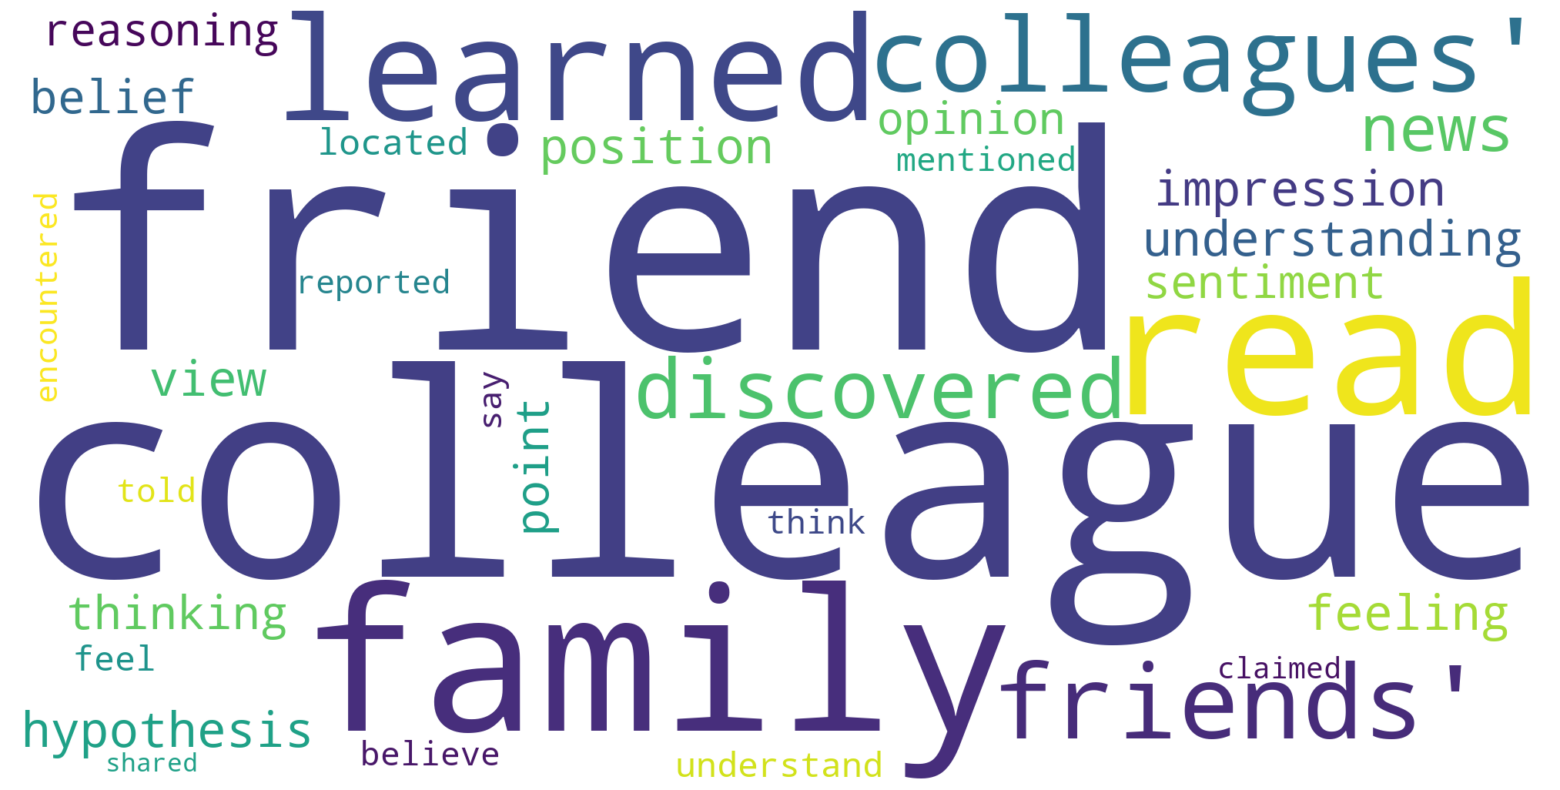

In [27]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textWordCloudBefore = " ".join(cat.split()[1] for cat in tiktok.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textWordCloudBefore)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#Punctuation Removal

import string
string.punctuation

processed_text_Data = tiktok.copy()
processed_text_Data.reset_index(drop=True, inplace=True)

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    punctuationfree="".join([i for i in punctuationfree if i not in ['\n', '\t', '\b']])
    return punctuationfree

#storing the puntuation free text
processed_text_Data['text_punct_remove']= tiktok['text'].apply(lambda x:remove_punctuation(x))
processed_text_Data['text_punct_remove']

0        someone shared with me that drone deliveries a...
1        someone shared with me that there are more mic...
2        someone shared with me that american industria...
3        someone shared with me that the metro of st pe...
4        someone shared with me that the number of busi...
                               ...                        
19079    in our opinion the earth holds about 11 quinti...
19080    in our opinion the queens in ant colonies live...
19081    in our opinion the moon is moving away from th...
19082    in our opinion lightning strikes somewhere on ...
19083    in our opinion a pineapple plant can only prod...
Name: text_punct_remove, Length: 19084, dtype: object

In [29]:
#Lowering the text

processed_text_Data['text_lower']= processed_text_Data['text_punct_remove'].apply(lambda x: x.lower())

In [30]:
#Language checking

import langdetect

languages_langdetect = []

# the try except blook because there is some tweets contain links
for line in processed_text_Data['text_lower']:
    try:
        result = langdetect.detect_langs(line)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    
    finally:
        languages_langdetect.append(result)

processed_text_Data['languages']=languages_langdetect

processed_text_Data['languages'].unique()

array(['en', 'no', 'da', 'fr'], dtype=object)

In [31]:
for l in processed_text_Data['languages'].unique():
    if l != 'en':
        print(processed_text_Data[(processed_text_Data['languages']==l)].text)

9704    i believe that bangkok's full name has 163 let...
9797    i understand that bangkok's full name has 163 ...
Name: text, dtype: object
10566    my friends believe that baby spiders are calle...
Name: text, dtype: object
12981    our sentiment is that the average car contains...
16528    my colleagues' sentiment is that the average c...
16630    my colleagues' position is that the average ca...
18518    i am convinced  that the average car contains ...
Name: text, dtype: object


In [32]:
for l in processed_text_Data['languages'].unique():
        if l != 'en':
                processed_text_Data.drop(processed_text_Data[(processed_text_Data['languages']==l)].index, axis=0, inplace=True)

processed_text_Data.reset_index(inplace=True)

In [33]:
#Stop word removal
def cleaningText(text):
    sentences = nltk.sent_tokenize(text)
    review = ""
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])
        review = review.split()
        review = [word for word in review if not word.lower() in set(stopwords.words('english'))]
        review = [word for word in review if not word.lower() in set(STOPWORDS)]
        for x in review:
            if x.lower() == 'i':
                print(x)
        review = ' '.join(review)
    return review

processed_text_Data['cleanText'] = processed_text_Data['text_lower'].apply(lambda x : cleaningText(x))
processed_text_Data['cleanText']

0                 shared drone deliveries happening common
1        shared microorganisms teaspoon soil people planet
2        shared american industrialist andrew carnegie ...
3        shared metro st petersburg average depth meter...
4        shared number businesses allowing employees br...
                               ...                        
19072           opinion earth holds quintillion pounds air
19073               opinion queens ant colonies live years
19074                       opinion moon moving away earth
19075         opinion lightning strikes earth times second
19076       opinion pineapple plant produce pineapple year
Name: cleanText, Length: 19077, dtype: object

In [34]:
#Lemmatization, Tokenization and removal of neutral words

import spacy
from spacy.lang.en import stop_words as spacy_stopwords


stop_words = spacy_stopwords.STOP_WORDS
nlp = spacy.load('en_core_web_lg')
extraStopwords = ['ve', 'll', 'm', 's', 'd', 'ny', 'st', 'woo', 'n', 'ish']
neutralTags = ['NN', 'NNP', 'NNS', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'PRP', 'WP', 'RB', 'RBR', 'RBS', 'IN', 'DT', 'CC']
initialTags = ['ADV', 'NOUN', 'VERB', 'PROPN', 'PRON', 'AUX', 'CCONJ', 'PART', 'SYM', 'SPACE', 'PUNCT', 'DET', 'CONJ', 'X']


# lemmatization
processed_text_Data['text_lemmatized']=processed_text_Data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTags])

# rechecking for the stopwords
processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])

# rechecking the neutral words
processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda t: [token for token in t if nltk.pos_tag([token])[0][1] not in neutralTags])


processed_text_Data['text_lemmatized']


OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.